In this notebook, I will edit attempt 1 to try to solve the sine wave without volume interferring. 

In this notebook, I will model a Sine wave with variable Volume over time, and then attempt to build a small neural network capable of returning beta coefficients for 4 variables: Magnitude, Phase Shift, Period, and Intercept. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
x = np.random.randint(100, size=1000)

In [4]:
x

array([16, 35, 91, 73,  1, 63,  7, 40, 76, 71, 80, 39, 42,  0, 32, 54, 86,
       11, 19, 84, 52, 35, 98, 95, 61, 10, 97,  2, 51, 25, 51, 33, 58, 60,
       77, 70, 69,  6, 59, 90, 13, 97, 97, 74, 39, 13, 25, 82, 47, 10, 80,
       75, 55, 76,  7, 84, 66, 85, 86, 15, 92, 24, 15, 76, 65, 14, 29, 78,
       96, 28, 33, 47, 47, 97, 72, 40, 83, 17,  3, 47, 28, 39, 12, 11, 58,
       49, 53, 90, 32, 11, 47, 67, 39,  4, 81, 61, 49, 29, 98, 48, 45, 46,
       37, 10, 49, 69, 97, 48, 83, 87, 58, 94, 32, 95, 29,  8, 52, 69,  5,
       47, 25, 75, 81, 87, 53, 50, 99, 35,  4, 44, 44, 67, 72, 96, 19, 84,
        2, 34, 14, 38, 94, 44,  3, 94, 93, 72, 16, 15, 65, 50, 61, 66, 16,
        7, 87,  4, 80, 72, 89, 76, 51, 46, 29, 23, 58, 67, 49, 67, 39,  8,
       29,  9, 59, 10, 32, 37, 52,  0, 36, 50, 67, 47, 37, 10, 19, 30, 65,
       59, 47, 16, 71, 34, 12, 26, 50, 46, 10, 48, 75, 53, 21, 49, 96, 14,
        7,  7, 92, 80, 32,  6, 73, 84, 48, 91, 83, 48, 31, 23, 19, 16, 43,
       32, 37, 29,  5, 68

In [5]:
x.shape

(1000,)

In [6]:
#x.reshape([100, 1])

In [7]:
Volume = np.random.randint(1000, size =1000)

In [8]:
Volume.shape

(1000,)

In [9]:
A = np.random.normal(10)
B = np.random.normal(20)
C = np.random.normal(5)
D = np.random.normal(30)

A, B, C, D

(10.118396919563253, 19.845360685369922, 5.38233934119589, 30.25150661713596)

In [10]:
# y = A sin( (x - B) / C)  + D

y = A* np.sin((x - B) / C) + D

In [11]:
y.shape

(1000,)

In [12]:
y2 = tf.constant([y.astype('float32')])

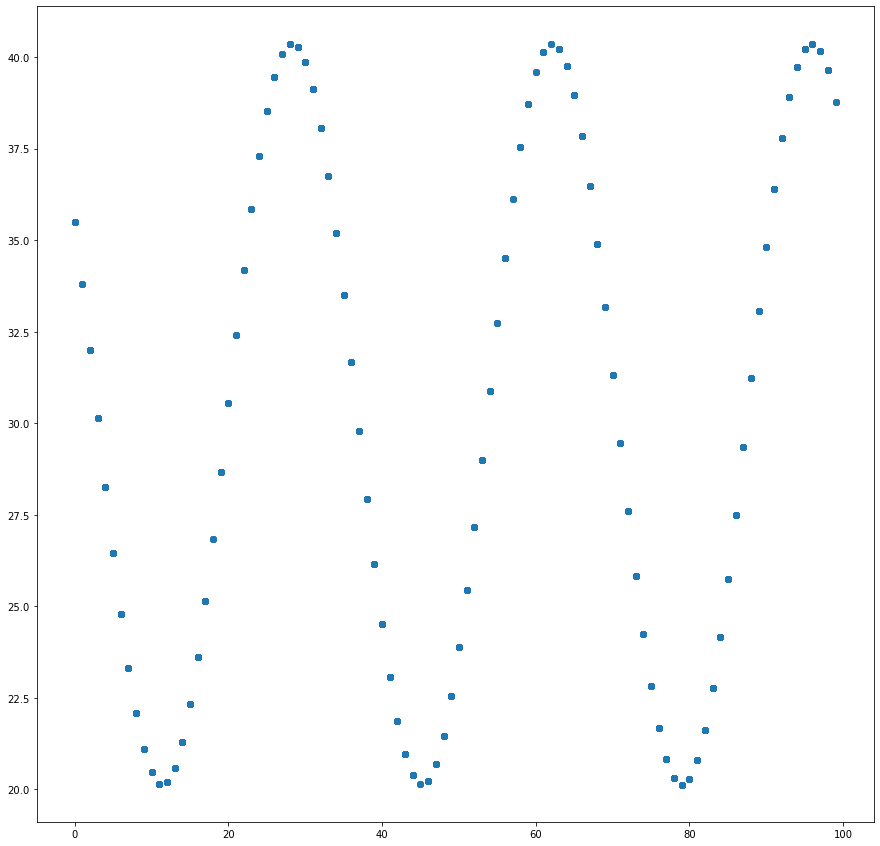

In [13]:
plt.figure(figsize=(15,15))
plt.scatter(x, y)

#### Build the modules or layers and then build the model 

Below is an example of layer modules and a class based model in tensorflow. I want to recreate this kind of code for a differentiable sine wave. 

In [14]:
### Example code
### https://www.tensorflow.org/guide

class Dense(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w = tf.Variable(
      tf.random.normal([in_features, out_features]), name='w')
    self.b = tf.Variable(tf.zeros([out_features]), name='b')
  def __call__(self, x):
    y = tf.matmul(x, self.w) + self.b
    return tf.nn.relu(y)

class SequentialModule(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)

    self.dense_1 = Dense(in_features=3, out_features=3)
    self.dense_2 = Dense(in_features=3, out_features=2)

  def __call__(self, x):
    x = self.dense_1(x)
    return self.dense_2(x)

# You have made a model!
my_model = SequentialModule(name="the_model")

# Call it, with random results
print("Model results:", my_model(tf.constant([[2.0, 2.0, 2.0]])))

Model results: tf.Tensor([[1.0743237 1.3780822]], shape=(1, 2), dtype=float32)


In [15]:
my_model.trainable_variables

(<tf.Variable 'b:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'w:0' shape=(3, 3) dtype=float32, numpy=
 array([[ 0.12768531, -0.145143  ,  0.4702714 ],
        [-0.08505119,  0.06562553,  0.30974448],
        [-0.07534283, -1.0001352 ,  0.13888702]], dtype=float32)>,
 <tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
 array([[-1.2371582 , -0.31285626],
        [ 1.2311695 ,  0.04092318],
        [ 0.5845687 ,  0.74985194]], dtype=float32)>)

In [24]:
class Addition(tf.Module):
    def __init__(self, inputs, name=None):
        super().__init__(name=name)
        self.b_1 = tf.Variable(tf.random.normal([inputs]), name='b1')
        #self.b_2 = tf.Variable(tf.zeros([inputs]), name='b2')
    def __call__(self, x):
        out = x + self.b_1
        #out = tf.math.multiply(out, self.b_1)
        return out
    
class Multiply(tf.Module):
    def __init__(self, inputs, name=None):
        super().__init__(name=name)
        self.b_2 = tf.Variable(tf.random.normal([inputs]), name='b2')
    def __call__(self, x):
        out = tf.math.multiply(x, self.b_2)
        return out

class Sinusoid(tf.Module):
    def __init__(self, inputs, name=None):
        super().__init__(name=name)
        #self.b_3 = tf.Variable(tf.random.normal([inputs]), name='b3')
    def __call__(self, x):
        sine = tf.math.sin(x)
        return sine
    
class Inject(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        #self.b_4 = tf.Variable(tf.random.normal([inputs]), name='b4')
    def __call__(self, x, v):
        multiple = tf.math.multiply(v, x)
        #multiple = tf.math.multiply(multiple, self.b_4)
        return multiple
    
class Sine_Model(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        
        self.add_1 = Addition(inputs=1, name='B')
        self.mult_1 = Multiply(inputs=1, name='C')
        self.sin_1 = Sinusoid(inputs=1)
        #self.inject_v = Inject()
        self.mult_2 = Multiply(inputs=1, name='A')
        self.add_2 = Addition(inputs=1, name='D')
        
    def __call__(self, x):
        x = self.add_1(x)
        x = self.mult_1(x)
        x = self.sin_1(x)
        #x = self.inject_v(x, v)
        x = self.mult_2(x)
        x = self.add_2(x)
        return x
        

In [98]:
sine_model = Sine_Model(name='sine')

In [99]:
sine_model

In [100]:
sine_model.trainable_variables

(<tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([-1.4222311], dtype=float32)>,
 <tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([-0.43879074], dtype=float32)>,
 <tf.Variable 'b2:0' shape=(1,) dtype=float32, numpy=array([-0.65973824], dtype=float32)>,
 <tf.Variable 'b2:0' shape=(1,) dtype=float32, numpy=array([-0.40075627], dtype=float32)>)

In [101]:
x2 = tf.constant([x.astype('float32')])
v2 = tf.constant([Volume.astype('float32')])

In [102]:
x1 = tf.constant([[2.0, 3.0]])
v1 = tf.constant([[4.0, 5.0]])

In [103]:
x1, v1

(<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[2., 3.]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[4., 5.]], dtype=float32)>)

In [104]:
output = sine_model(x1)


In [105]:
output

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.28970438, -0.09299144]], dtype=float32)>

In [106]:
# y = A sin( (x - B) / C)  + D
var_vals = []
for train_var in sine_model.trainable_variables:
    var_vals.append(train_var.numpy())
    
check_output = np.sin(var_vals[2]*(x1 + var_vals[0])) *var_vals[3] + var_vals[1]

In [107]:
check_output

array([[-0.28970438, -0.09299144]], dtype=float32)

In [108]:
output == check_output

<tf.Tensor: shape=(1, 2), dtype=bool, numpy=array([[ True,  True]])>

In [109]:
def check_output(x):
    output = sine_model(x)
    
    var_vals = []
    for train_var in sine_model.trainable_variables:
        var_vals.append(train_var.numpy())
        
    check_output = np.sin(var_vals[2]*(x + var_vals[0])) *var_vals[3] + var_vals[1]
    
    print(output == check_output)

In [110]:
check_output(x2)

tf.Tensor(
[[ True  True  True  True  True  True  True False  True  True  True  True
   True  True  True False  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True False  True  True  True  True  True  True  True  True  True  True
   True  True  True False  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  

In [111]:
# model_results = sine_model(x2, v2)

# var_vals = []
# for train_var in sine_model.trainable_variables:
#     var_vals.append(train_var.numpy())
    
# check_results = np.sin(var_vals[3]*(x2 + var_vals[0])) * v2*var_vals[2] + var_vals[1]

In [112]:
#model_results == check_results

In [113]:
#model_results, check_results

#### Learn to solve for variables

In the next section, I will test gradient descent to optimize the beta coefficients and solve the function. 

In [114]:
model = sine_model

In [135]:
## Choose a loss object

## From the example
# loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_object = tf.keras.losses.MeanSquaredError()

optimizer = tf.keras.optimizers.Adam(learning_rate=1)

In [136]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
#train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
#test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

# tf.keras.metrics.MeanSquaredError(
#     name='mean_squared_error', dtype=None
# )

In [137]:
# train the model

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = model(x)
        loss = loss_object(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    #print(loss)
    train_loss(loss)
    #train_accuracy(labels, predictions)

In [138]:
# test the model 

@tf.function
def test_step(x, y):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(x)
    t_loss = loss_object(y, predictions)

    test_loss(t_loss)
    #test_accuracy(labels, predictions)

In [139]:
x2, v2, y2

(<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
 array([[16., 35., 91., 73.,  1., 63.,  7., 40., 76., 71., 80., 39., 42.,
          0., 32., 54., 86., 11., 19., 84., 52., 35., 98., 95., 61., 10.,
         97.,  2., 51., 25., 51., 33., 58., 60., 77., 70., 69.,  6., 59.,
         90., 13., 97., 97., 74., 39., 13., 25., 82., 47., 10., 80., 75.,
         55., 76.,  7., 84., 66., 85., 86., 15., 92., 24., 15., 76., 65.,
         14., 29., 78., 96., 28., 33., 47., 47., 97., 72., 40., 83., 17.,
          3., 47., 28., 39., 12., 11., 58., 49., 53., 90., 32., 11., 47.,
         67., 39.,  4., 81., 61., 49., 29., 98., 48., 45., 46., 37., 10.,
         49., 69., 97., 48., 83., 87., 58., 94., 32., 95., 29.,  8., 52.,
         69.,  5., 47., 25., 75., 81., 87., 53., 50., 99., 35.,  4., 44.,
         44., 67., 72., 96., 19., 84.,  2., 34., 14., 38., 94., 44.,  3.,
         94., 93., 72., 16., 15., 65., 50., 61., 66., 16.,  7., 87.,  4.,
         80., 72., 89., 76., 51., 46., 29., 23., 58., 67., 4

In [140]:
EPOCHS = 200

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    #train_accuracy.reset_states()
    test_loss.reset_states()
    #test_accuracy.reset_states()

    #for images, labels in train_ds:
    # from example code, commented out due to dealing with batches
    train_step(x2, y2)

    #for test_images, test_labels in test_ds:
    test_step(x2, y2)

    template = 'Epoch {}, Loss: {}, Test Loss: {}'
    print(template.format(epoch + 1,
                            train_loss.result(),
                            test_loss.result()))

Epoch 1, Loss: 52.053672790527344, Test Loss: 52.679195404052734
Epoch 2, Loss: 52.679195404052734, Test Loss: 51.47708511352539
Epoch 3, Loss: 51.47708511352539, Test Loss: 52.818206787109375
Epoch 4, Loss: 52.818206787109375, Test Loss: 53.0960693359375
Epoch 5, Loss: 53.0960693359375, Test Loss: 51.81835174560547
Epoch 6, Loss: 51.81835174560547, Test Loss: 51.87383270263672
Epoch 7, Loss: 51.87383270263672, Test Loss: 51.41260528564453
Epoch 8, Loss: 51.41260528564453, Test Loss: 51.590511322021484
Epoch 9, Loss: 51.590511322021484, Test Loss: 51.911476135253906
Epoch 10, Loss: 51.911476135253906, Test Loss: 51.999603271484375
Epoch 11, Loss: 51.999603271484375, Test Loss: 51.57391357421875
Epoch 12, Loss: 51.57391357421875, Test Loss: 51.66203308105469
Epoch 13, Loss: 51.66203308105469, Test Loss: 51.73280334472656
Epoch 14, Loss: 51.73280334472656, Test Loss: 51.57894515991211
Epoch 15, Loss: 51.57894515991211, Test Loss: 51.6221809387207
Epoch 16, Loss: 51.6221809387207, Test Lo

Epoch 187, Loss: 51.483638763427734, Test Loss: 51.45287322998047
Epoch 188, Loss: 51.45287322998047, Test Loss: 51.467796325683594
Epoch 189, Loss: 51.467796325683594, Test Loss: 51.44092559814453
Epoch 190, Loss: 51.44092559814453, Test Loss: 51.543033599853516
Epoch 191, Loss: 51.543033599853516, Test Loss: 51.37411880493164
Epoch 192, Loss: 51.37411880493164, Test Loss: 51.44327163696289
Epoch 193, Loss: 51.44327163696289, Test Loss: 51.63702392578125
Epoch 194, Loss: 51.63702392578125, Test Loss: 51.595584869384766
Epoch 195, Loss: 51.595584869384766, Test Loss: 51.47707748413086
Epoch 196, Loss: 51.47707748413086, Test Loss: 51.518829345703125
Epoch 197, Loss: 51.518829345703125, Test Loss: 51.4399299621582
Epoch 198, Loss: 51.4399299621582, Test Loss: 51.51140594482422
Epoch 199, Loss: 51.51140594482422, Test Loss: 51.45478820800781
Epoch 200, Loss: 51.45478820800781, Test Loss: 51.50775909423828


In [141]:
sine_model.trainable_variables

(<tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([-42.215176], dtype=float32)>,
 <tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([29.817675], dtype=float32)>,
 <tf.Variable 'b2:0' shape=(1,) dtype=float32, numpy=array([70.80642], dtype=float32)>,
 <tf.Variable 'b2:0' shape=(1,) dtype=float32, numpy=array([0.27792817], dtype=float32)>)

In [142]:
A, B, C, D

(10.118396919563253, 19.845360685369922, 5.38233934119589, 30.25150661713596)

In [143]:
y_predicted = sine_model(x2)

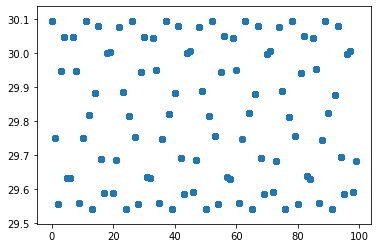

In [144]:
plt.scatter(x, y_predicted.numpy()[0])


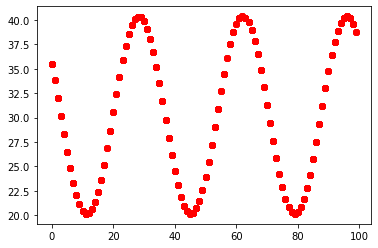

In [72]:
plt.scatter(x, y, c='r')